# Olympic Athletes

# Business understanding

Business goals :  
  
Using the dataset to find some correlations between the characteristics of the athletes and the results obtained in general. Morevover, we can aso search for the relation with the countries to see how sports are more likely related to different countries than other in function of different parameters (population, location, history etc). 
In a more buisiness way, we can point out the fields through clustering that can attract public or private funding for further improvements and maybe discover some countries or type of atheletes which can be good at a specific sport and then facilitate the evolution of the Olympics games.

# Data understanding

Gathering data:  
To adress the data mining goal we need to get the maximum of data about the olympic athletes of the maximum Olympic Games possible. The types of necessary data can be numerical and categorical, it depends of the goal of the specific task we want to deal with. We found the dataset on the website Kaggle, this dataset is really full and apparently without missing data. It contains all the olympic athletes who had participated to Olympic Games during the last 120 years. It seems to be a very good dataset to allow us to make a good study. In this dataset we will probably use the following columns: "Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal". We will probably reduce the dataset to work easier on it because there is more than 270 000 rows. We may remove and keep the last 20 years for example to keep a certain logic in the data or just remove randomely but it may create some inconsistent results.

Describing data:  
For this study we have a csv file with 271 117 rows and 15 columns. This dataset contains atheletes descriptions("Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal") of all Olympics Games during the last 120 years. We foud this dataset on the website Kaggle.

Explorating data:  

- ID: athlete identification -> numerical
- Name: name of the athle -> nominal
- Sex: Sex of the athlete(Male or Female) -> nominal
- Age: age of the athlete -> numerical
- Height: height of the athlete -> numerical
- Weight: weight of the athlete -> numerical
- Team: Country where come from the athlete -> nominal
- NOC: Country code -> nominal
- Games: the year and the type of Olympic Games(Summer or Winter) -> nominal
- Year: year of the game -> numerical
- Season: season of the Olympic game -> nominal
- City: city where the Olympic Game take place -> nominal
- Sport: Sport practiced by the athlete -> nominal
- Event: Event practiced by the athlete -> nominal
- Medal: Medal obtained by the athlete(Gold, Silver, Bronze or NA) -> ordinal

Data quality:  
All the data that we need is there, because this dataset is all the data of the Olympic Games since 120 years and there are all the information in the column that we need for our goal. Moreover, all the data is easily accessable because it's a simple CSV file. Finally, there is no special data quality issue founded in this dataset such as an impossible age, weight or height or a typing error.

Tasks :  
  
- data preparation (14h)
- modeling (12h)
- creation of a predictor (12h)
- evaluation (12h)
- deployment (10h)
- poster preparation (10h)

In [16]:
import numpy as np
import pandas as pd

# TODO 
data = pd.read_csv("athlete_events.csv")

In [17]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("ggplot")

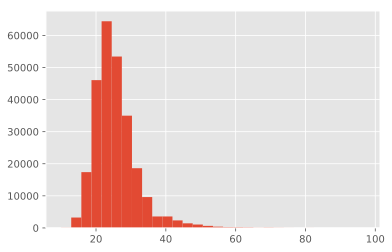

In [19]:
pd.to_numeric(data['Age'], errors='coerce').hist(bins=30)

In [20]:
data1 = data[data["Age"]<=70]
data1["Age"].value_counts()

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
26.0    17675
27.0    16025
20.0    15258
28.0    14043
19.0    11643
29.0    11463
30.0     9488
18.0     8152
31.0     7559
32.0     6246
17.0     5376
33.0     4800
34.0     3985
16.0     3852
35.0     3133
36.0     2503
15.0     2203
37.0     1953
38.0     1612
39.0     1405
40.0     1210
41.0      953
42.0      866
14.0      837
43.0      793
        ...  
45.0      584
46.0      429
47.0      408
48.0      407
49.0      362
50.0      278
52.0      244
53.0      200
51.0      199
13.0      187
54.0      162
56.0      131
55.0      104
60.0       88
59.0       87
65.0       84
58.0       84
57.0       69
61.0       68
62.0       62
69.0       60
63.0       56
12.0       39
66.0       31
64.0       30
70.0       28
67.0       25
68.0       25
11.0       13
10.0        1
Name: Age, Length: 61, dtype: int64

We can remark that they are many old athletes (like a 96 years old man who died at 80) which that he participated to the olypics when he was dead (it was a art event). So we decided to remove all athletes of more than 70 years old.

In [21]:
t = data["NOC"].value_counts()

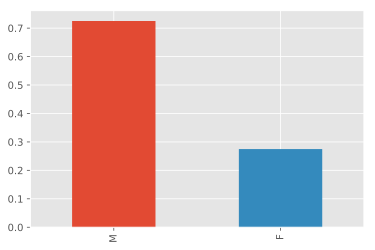

In [22]:
data["Sex"].value_counts(1).plot(kind='bar')

In [23]:
data["Games"].value_counts()

2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Winter  

In [24]:
data["City"].value_counts()

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [25]:
data["Sport"].value_counts()

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1457
Nordic C

In [26]:
data["Event"].value_counts()

Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
Cycling Men's Road Race, Individual                    2947
Gymnastics Men's Individual All-Around                 2500
Rowing Men's Coxed Eights                              2423
Gymnastics Men's Team All-Around                       2411
Handball Men's Handball                                2264
Athletics Men's Marathon                               2093
Gymnastics Men's Parallel Bars                         2049
Gymnastics Men's Horizontal Bar                        2041
Gymnastics Men's Pommelled Horse                       2031
Gymnastics Men's Rings                                 2020
Athletics Men's 100 metres                             1936
Athletics Men's 4 x 100 metres Relay    

In [27]:
data["Medal"].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

We now have checked all the different values in the columns and there is no apparent wrong data.

In [28]:
data_summer = data[data["Season"] == "Summer"]
data_topp = data_summer[(data_summer["NOC"] == "USA")| (data_summer["NOC"] == "GBR") | (data_summer["NOC"] == "FRA")| (data_summer["NOC"] == "GER") | (data_summer["NOC"] == "CHN")]
data_pays = data_topp.groupby(["NOC","Year"]).count()
data_ath_nb = data_pays["ID"]
dfS = pd.crosstab(data_topp["NOC"],data_topp["Year"],values=data["ID"], aggfunc='count',rownames=['NOC'], colnames=['Year'])
dfS

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
NOC,,,,,,,,,,,,,,,,,,,,,
CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,323.0,427.0,394.0,438.0,414.0,518.0,730.0,479.0,499.0
FRA,26.0,1071.0,2.0,174.0,319.0,232.0,452.0,636.0,422.0,159.0,...,200.0,354.0,413.0,486.0,453.0,470.0,461.0,448.0,426.0,512.0
GBR,25.0,146.0,6.0,113.0,972.0,461.0,345.0,428.0,354.0,170.0,...,328.0,509.0,472.0,512.0,391.0,415.0,360.0,420.0,684.0,478.0
GER,94.0,103.0,55.0,157.0,148.0,312.0,NaN,NaN,399.0,202.0,...,NaN,NaN,NaN,653.0,626.0,567.0,592.0,558.0,510.0,536.0
USA,27.0,135.0,1109.0,81.0,219.0,364.0,473.0,459.0,426.0,743.0,...,NaN,693.0,715.0,734.0,839.0,764.0,726.0,763.0,689.0,719.0


Text(0.5,1,'Performance Evolution per Country / Summer Games')

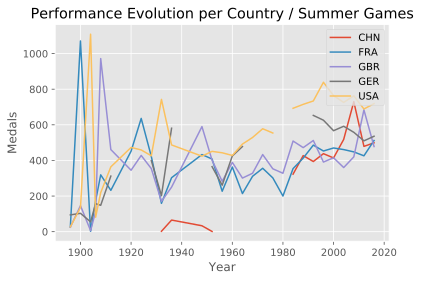

In [29]:
for index, row in dfS.iterrows():
    row.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Athletes")
plt.legend(loc="upper right")
plt.title("Performance Evolution per Country / Summer Games")

In [30]:
data_winter = data[data["Season"] == "Winter"]
data_toppW = data_winter[(data_winter["NOC"] == "USA")| (data_winter["NOC"] == "GBR") | (data_winter["NOC"] == "FRA")| (data_winter["NOC"] == "GER") | (data_winter["NOC"] == "CHN")]
data_paysW = data_toppW.groupby(["NOC","Year"]).count()
data_ath_nbW = data_paysW["ID"]
dfW = pd.crosstab(data_toppW["NOC"],data_toppW["Year"],values=data["ID"], aggfunc='count',rownames=['NOC'], colnames=['Year'])
dfW

Year,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,...,1980,1984,1988,1992,1994,1998,2002,2006,2010,2014
NOC,,,,,,,,,,,,,,,,,,,,,
CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.0,70.0,15.0,74.0,43.0,88.0,108.0,146.0,127.0,109.0
FRA,68.0,47.0,8.0,34.0,60.0,45.0,52.0,55.0,50.0,118.0,...,44.0,57.0,115.0,184.0,169.0,159.0,176.0,159.0,196.0,201.0
GBR,50.0,39.0,4.0,40.0,78.0,35.0,69.0,39.0,65.0,64.0,...,76.0,78.0,95.0,90.0,51.0,45.0,70.0,54.0,78.0,78.0
GER,NaN,51.0,23.0,67.0,NaN,77.0,90.0,110.0,144.0,NaN,...,NaN,NaN,NaN,193.0,184.0,217.0,259.0,263.0,259.0,271.0
USA,41.0,45.0,70.0,74.0,97.0,96.0,92.0,105.0,127.0,135.0,...,155.0,156.0,197.0,234.0,237.0,284.0,313.0,325.0,341.0,367.0


Text(0.5,1,'Performance Evolution per Country / Winter Games')

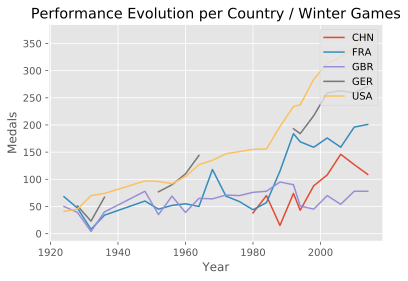

In [31]:
for index, row in dfW.iterrows():
    row.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Athletes")
plt.legend(loc="upper right")
plt.title("Performance Evolution per Country / Winter Games")

In [32]:
dfMedals = data_summer[(data_summer["Medal"] == "Gold")|(data_summer["Medal"] == "Silver")|(data_summer["Medal"] == "Bronze")]
dataSports = dfMedals[(dfMedals["Sport"] == "Athletics") | (dfMedals["Sport"] == "Gymnastics") |(dfMedals["Sport"] == "Boxing") |(dfMedals["Sport"] == "Swimming") |(dfMedals["Sport"] == "Judo") ]
dfSports = dataSports.groupby(["Event","Year"]).count()
dfAge = pd.crosstab(dataSports["Sport"],dataSports["Year"],values=data["Age"], aggfunc=np.mean,rownames=['Event'], colnames=['Year'])
dfAge

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Event,,,,,,,,,,,,,,,,,,,,,
Athletics,22.344828,23.506667,23.608108,25.142857,24.861386,23.443662,25.169231,24.759690,23.481481,23.385965,...,24.503268,24.692308,25.520000,25.797753,26.566667,26.778947,25.644444,25.352941,25.973684,26.411458
Boxing,NaN,NaN,22.538462,NaN,24.615385,NaN,21.318182,21.583333,21.000000,21.217391,...,22.250000,21.595745,22.875000,22.708333,23.666667,23.791667,23.840909,24.386364,24.596154,24.862745
Gymnastics,25.322581,25.000000,26.400000,24.547619,22.608247,24.525253,26.335329,28.272727,23.685714,24.022222,...,20.333333,20.786667,19.413333,18.701299,20.087500,20.694444,21.652778,21.083333,20.848485,21.787879
Judo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.218750,25.156250,26.321429,23.642857,24.196429,25.750000,25.803571,25.232143,25.892857,25.714286
Swimming,18.750000,19.800000,21.921053,24.250000,21.846154,20.800000,21.729167,20.425926,19.962963,19.862745,...,18.755725,19.842105,20.562874,20.923077,21.983425,22.513514,22.448649,22.855000,23.338462,23.230366


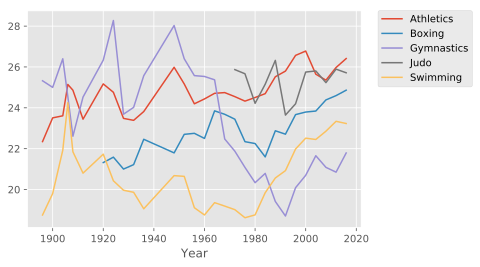

In [33]:
for index, row in dfAge.iterrows():
    row.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [34]:
dfMedalsW = data_winter[(data_winter["Medal"] == "Gold")|(data_winter["Medal"] == "Silver")|(data_winter["Medal"] == "Bronze")]
dataSportsW = dfMedalsW[(dfMedalsW["Sport"] == "Alpine Skiing") | (dfMedalsW["Sport"] == "Biathlon") |(dfMedalsW["Sport"] == "Ski Jumping") |(dfMedalsW["Sport"] == "Snowboarding") |(dfMedalsW["Sport"] == "Bobsleigh") ]
dfSportsW = dataSportsW.groupby(["Event","Year"]).count()
dfAgeW = pd.crosstab(dataSportsW["Sport"],dataSportsW["Year"],values=data["Age"], aggfunc=np.mean,rownames=['Event'], colnames=['Year'])
dfAgeW

Year,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,...,1980,1984,1988,1992,1994,1998,2002,2006,2010,2014
Event,,,,,,,,,,,,,,,,,,,,,
Alpine Skiing,NaN,NaN,NaN,21.666667,24.368421,23.777778,24.055556,22.722222,21.888889,23.055556,...,21.722222,22.611111,23.566667,23.866667,23.500000,25.966667,25.966667,27.366667,26.766667,27.645161
Biathlon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.666667,28.000000,26.400000,...,25.111111,23.333333,24.500000,23.969697,25.583333,26.027778,28.619048,30.104167,27.479167,27.816667
Bobsleigh,27.500000,28.214286,33.166667,28.444444,32.777778,33.777778,31.000000,NaN,30.000000,29.222222,...,29.000000,28.055556,29.166667,28.555556,28.722222,29.681818,30.375000,29.208333,29.583333,30.541667
Ski Jumping,27.666667,21.333333,19.666667,25.333333,30.000000,24.333333,25.000000,21.333333,24.333333,24.833333,...,20.500000,20.166667,23.166667,20.944444,23.611111,24.388889,22.666667,25.000000,26.111111,25.476190
Snowboarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.333333,23.583333,24.333333,26.611111,25.066667


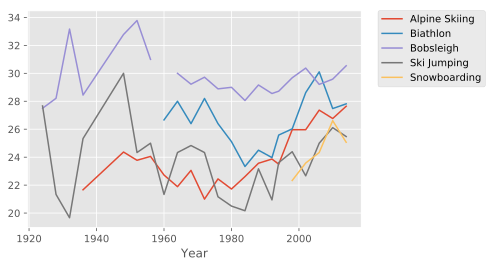

In [35]:
for index, row in dfAgeW.iterrows():
    row.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [36]:
cross = pd.crosstab(data["NOC"], data["Medal"])
cross = cross.rename_axis('Country').reset_index()
cross["Total Medals"] = cross[['Gold', 'Bronze', "Silver"]].sum(axis=1)
cross

Medal,Country,Bronze,Gold,Silver,Total Medals
0,AFG,2,0,0,2
1,AHO,0,0,1,1
2,ALG,8,5,4,17
3,ANZ,5,20,4,29
4,ARG,91,91,92,274
5,ARM,9,2,5,16
6,AUS,517,348,455,1320
7,AUT,156,108,186,450
8,AZE,25,7,12,44
9,BAH,15,14,11,40


In [37]:
cross = cross.sort_values(by="Total Medals", ascending=False)
cross2 = cross.head(10)
display(cross2)

Medal,Country,Bronze,Gold,Silver,Total Medals
141,USA,1358,2638,1641,5637
139,URS,689,1082,732,2503
49,GER,746,745,674,2165
46,GBR,651,678,739,2068
43,FRA,666,501,610,1777
67,ITA,531,575,531,1637
123,SWE,535,479,522,1536
20,CAN,451,463,438,1352
6,AUS,517,348,455,1320
112,RUS,408,390,367,1165


Text(0.5,1,"120-Years Olympic Top Teams' Medals")

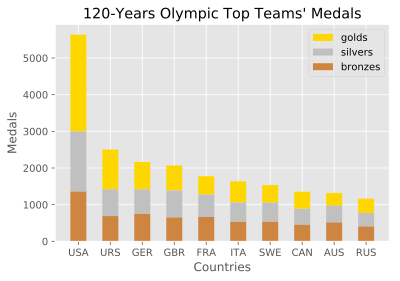

In [38]:
countries = ['USA', 'URS', 'GER', 'GBR', 'FRA', 'ITA', 'SWE', 'CAN', 'AUS','RUS']

plt.bar(countries, cross2["Gold"], width=0.5, label='golds', color='gold', bottom=(cross2['Silver']+cross2['Bronze']))
plt.bar(countries, cross2["Silver"], width=0.5, label='silvers', color='silver', bottom = cross2["Bronze"])
plt.bar(countries, cross2["Bronze"], width=0.5, label='bronzes', color='#CD853F')

plt.xticks(countries, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("120-Years Olympic Top Teams' Medals")

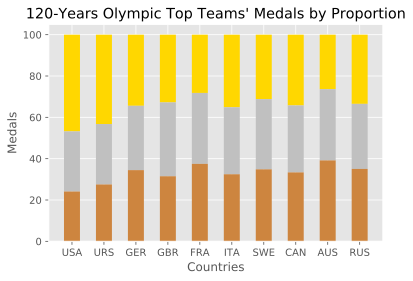

In [39]:
proportion_bronzes = np.true_divide(cross2["Bronze"], cross2["Total Medals"]) * 100
proportion_silvers = np.true_divide(cross2["Silver"], cross2["Total Medals"]) * 100
proportion_golds = np.true_divide(cross2["Gold"], cross2["Total Medals"]) * 100

plt.bar(countries, proportion_golds, width=0.5, label='golds', color='gold', bottom=proportion_bronzes+proportion_silvers)
plt.bar(countries, proportion_silvers, width=0.5, label='silvers', color='silver', bottom=proportion_bronzes)
plt.bar(countries, proportion_bronzes, width=0.5, label='bronzes', color='#CD853F')

plt.xticks(countries, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.title("120-Years Olympic Top Teams' Medals by Proportion")
plt.ylim=1.0

In [40]:
cross2.Country.unique()

array(['USA', 'URS', 'GER', 'GBR', 'FRA', 'ITA', 'SWE', 'CAN', 'AUS',
       'RUS'], dtype=object)

In [42]:
crossSport = pd.crosstab(data["NOC"], data["Sport"])
crossSport = cross.rename_axis('Countries').reset_index()
crossSport["Total Medals"] = cross[['Gold', 'Bronze', "Silver"]].max(axis=1)
crossSport

Medal,Countries,Country,Bronze,Gold,Silver,Total Medals
0,141,USA,1358,2638,1641,2
1,139,URS,689,1082,732,1
2,49,GER,746,745,674,8
3,46,GBR,651,678,739,20
4,43,FRA,666,501,610,92
5,67,ITA,531,575,531,9
6,123,SWE,535,479,522,517
7,20,CAN,451,463,438,186
8,6,AUS,517,348,455,25
9,112,RUS,408,390,367,15


In [43]:
TSM = data.groupby(['Sport'])['Medal'].agg(['count'])
TSM = TSM.rename_axis('Sports').reset_index()
TSM = TSM.rename(columns={"count": "Medals"})
TSM = TSM.sort_values(by="Sports", ascending = True)
TSM

,Sports,Medals
0,Aeronautics,1
1,Alpine Skiing,428
2,Alpinism,25
3,Archery,353
4,Art Competitions,156
5,Athletics,3969
6,Badminton,168
7,Baseball,336
8,Basketball,1080
9,Basque Pelota,2


In [44]:
Top_Sport = data["Sport"].value_counts()
TS = pd.Series.to_frame(Top_Sport)
TS = TS.rename_axis('Sports').reset_index()
TS = TS.rename(columns={"Sport": "Athletes"})
TS = TS.sort_values(by="Sports", ascending = True)
TS

,Sports,Athletes
65,Aeronautics,1
8,Alpine Skiing,8829
56,Alpinism,25
30,Archery,2334
24,Art Competitions,3578
0,Athletics,38624
36,Badminton,1457
41,Baseball,894
19,Basketball,4536
64,Basque Pelota,2


In [45]:
Sport = TS.merge(TSM)
Sport["Success"] =  (Sport["Medals"] / Sport["Athletes"]) *100
Sport = Sport.sort_values(by="Athletes", ascending = False).head(10)
Sport1 = Sport.replace(["Cross Country Skiing"],["Country Skiing"])
Sport1

,Sports,Athletes,Medals,Success
5,Athletics,38624,3969,10.275994
27,Gymnastics,26707,2256,8.447224
54,Swimming,23195,3048,13.140763
47,Shooting,11448,1228,10.726765
19,Cycling,10859,1263,11.630905
22,Fencing,10735,1743,16.236609
43,Rowing,10595,2945,27.796130
17,Country Skiing,9133,776,8.496660
1,Alpine Skiing,8829,428,4.847661
65,Wrestling,7154,1296,18.115739


In [46]:
Sport.Sports.unique()

array(['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling',
       'Fencing', 'Rowing', 'Cross Country Skiing', 'Alpine Skiing',
       'Wrestling'], dtype=object)

Text(0.5,1,'Most Popular Sports Success Rate')

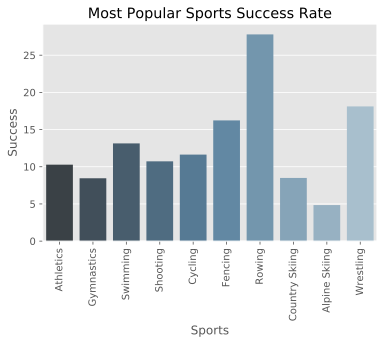

In [47]:
import seaborn as sns

ax = sns.barplot(x="Sports", y="Success", data=Sport1, palette="Blues_d", saturation=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Most Popular Sports Success Rate')

In [48]:
Sport["Athletes"].mean()

15727.9

In [49]:
Sport = TS.merge(TSM)
Sport["Success"] =  (Sport["Medals"] / Sport["Athletes"]) *100
Sport = Sport.sort_values(by="Athletes", ascending = True).head(15)
Sport2 = Sport.replace(["Cross Country Skiing"],["Country Skiing"])
Sport2

,Sports,Athletes,Medals,Success
0,Aeronautics,1,1,100.000000
9,Basque Pelota,2,2,100.000000
42,Roque,4,3,75.000000
31,Jeu De Paume,11,3,27.272727
40,Racquets,12,10,83.333333
37,Motorboating,17,7,41.176471
16,Croquet,19,8,42.105263
35,Military Ski Patrol,24,12,50.000000
15,Cricket,24,24,100.000000
2,Alpinism,25,25,100.000000


Text(0.5,1,'Least Popular Sports Success Rate')

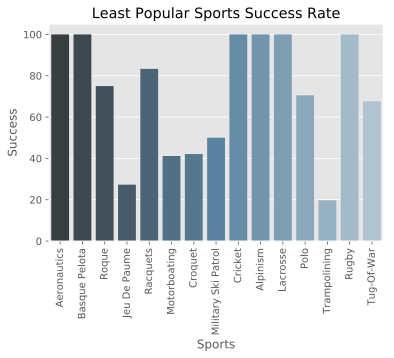

In [50]:
ax = sns.barplot(x="Sports", y="Success", data=Sport2, palette="Blues_d", saturation=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Least Popular Sports Success Rate')